In [22]:
import pandas as pd

In [36]:
config_id = 0

model_results = pd.read_excel(f'best_models_results_{config_id}.xlsx')
model_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   T                180 non-null    int64  
 1   window_size      180 non-null    int64  
 2   hidden_dim       180 non-null    int64  
 3   num_layers       180 non-null    int64  
 4   best_val_loss    180 non-null    float64
 5   best_model_path  180 non-null    object 
dtypes: float64(1), int64(4), object(1)
memory usage: 8.6+ KB


In [37]:
# 按照 best_val_loss 进行排序
model_results.sort_values(by='best_val_loss', inplace=True)
model_results.reset_index(drop=True, inplace=True)
model_results.head(10)

,T,window_size,hidden_dim,num_layers,best_val_loss,best_model_path
0,30,120,70,9,0.00000100,lstm_models\best_lstm_model_T30_window120_hidd...
1,30,120,50,3,0.00000103,lstm_models\best_lstm_model_T30_window120_hidd...
2,30,120,50,9,0.00000108,lstm_models\best_lstm_model_T30_window120_hidd...
3,30,120,30,3,0.00000110,lstm_models\best_lstm_model_T30_window120_hidd...
4,30,120,70,5,0.00000127,lstm_models\best_lstm_model_T30_window120_hidd...
5,30,120,30,9,0.00000129,lstm_models\best_lstm_model_T30_window120_hidd...
6,30,120,70,3,0.00000134,lstm_models\best_lstm_model_T30_window120_hidd...
7,30,120,50,5,0.00000143,lstm_models\best_lstm_model_T30_window120_hidd...
8,30,120,30,5,0.00000168,lstm_models\best_lstm_model_T30_window120_hidd...
9,30,60,30,3,0.00000203,lstm_models\best_lstm_model_T30_window60_hidde...


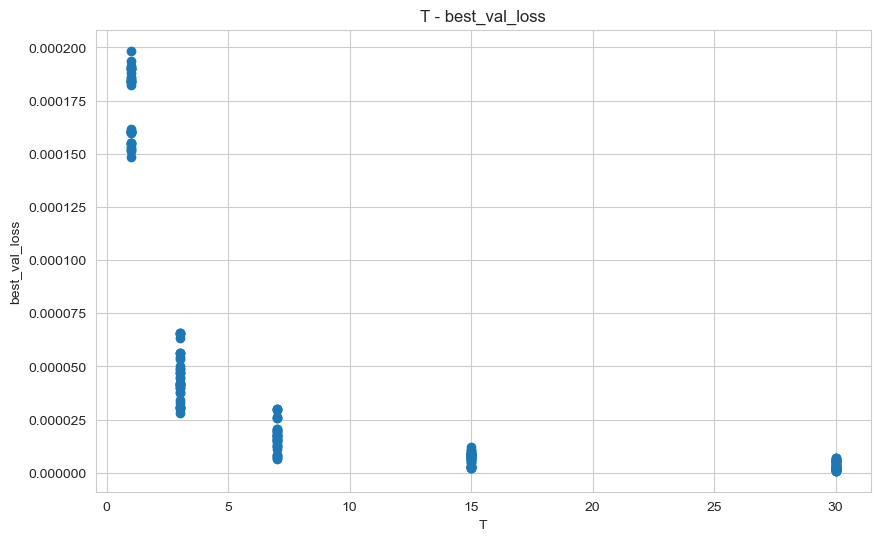

In [38]:
# 可视化分析T与best_val_loss的关系
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(model_results['T'], model_results['best_val_loss'], 'o')
plt.xlabel('T')
plt.ylabel('best_val_loss')
plt.title('T - best_val_loss')
plt.show()

In [39]:
from data.get_data import get_common_data

data = get_common_data('SHSE.510300', '2008-01-01', '2020-01-01', 1)

# 计算data最后一列的均值
data['avg_daily_return_1'].mean()

# 计算方差
data['avg_daily_return_1'].var()

0.0002474129546168351

## NMSE计算，可视化T - NMSE

In [41]:
model_results['best_valLoss%var'] = model_results['best_val_loss'] / data['avg_daily_return_1'].var()

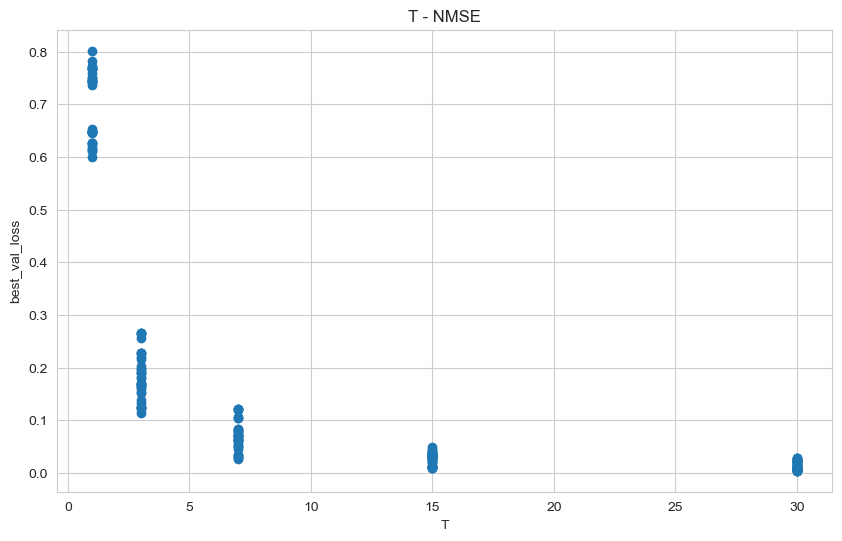

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(model_results['T'], model_results['best_valLoss%var'], 'o')
plt.xlabel('T')
plt.ylabel('best_val_loss')
plt.title('T - NMSE')
plt.show()

In [ ]:
## 查看NMSE最小的模型们对应的超参数

In [30]:
# 按照best_valLoss%var进行排序
model_results.sort_values(by='best_valLoss%var', inplace=True)
model_results.reset_index(drop=True, inplace=True)
model_results

,T,window_size,hidden_dim,num_layers,best_val_loss,best_model_path,best_valLoss%var
0,1,20,30,3,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
1,1,40,30,9,0.00000000,lstm_models_1\best_lstm_model_T1_window40_hidd...,0.00000000
2,1,20,30,5,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
3,1,20,30,9,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
4,1,20,50,3,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
...,...,...,...,...,...,...,...
175,7,120,50,5,0.00000651,lstm_models_1\best_lstm_model_T7_window120_hid...,0.02629530
176,7,120,70,3,0.00000735,lstm_models_1\best_lstm_model_T7_window120_hid...,0.02971491
177,7,120,70,5,0.00000759,lstm_models_1\best_lstm_model_T7_window120_hid...,0.03067944
178,7,120,50,9,0.00001468,lstm_models_1\best_lstm_model_T7_window120_hid...,0.05932296


In [31]:
# 查看每个T对应的NMSE最小的模型
model_results.groupby('T').first()

,window_size,hidden_dim,num_layers,best_val_loss,best_model_path,best_valLoss%var
T,,,,,,
1,20,30,3,0.00000000,lstm_models_1\best_lstm_model_T1_window20_hidd...,0.00000000
3,40,50,5,0.00000000,lstm_models_1\best_lstm_model_T3_window40_hidd...,0.00000000
7,40,70,9,0.00000000,lstm_models_1\best_lstm_model_T7_window40_hidd...,0.00000000
15,120,50,5,0.00000185,lstm_models_1\best_lstm_model_T15_window120_hi...,0.00748087
30,120,30,3,0.00000110,lstm_models_1\best_lstm_model_T30_window120_hi...,0.00445722


# T与threshold调参结果分析

In [34]:
config_id = 'test'
data = pd.read_excel(f'optimization_results_{config_id}.xlsx')
data

,0
0,"{'params': {'T': 1, 'threshold': 0.001}, 'pnl_..."
1,"{'params': {'T': 3, 'threshold': 0.001}, 'pnl_..."
2,"{'params': {'T': 7, 'threshold': 0.001}, 'pnl_..."
3,"{'params': {'T': 15, 'threshold': 0.001}, 'pnl..."
4,"{'params': {'T': 30, 'threshold': 0.001}, 'pnl..."


In [35]:
import ast

# 将字符串转换为字典
dict_data = ast.literal_eval(data.iloc[0,0])

# 获取字典的所有键
keys = list(dict_data.keys())
df = pd.DataFrame(columns=keys)
for i in range(len(data)):
    # 将当前行的字符串转换为字典
    row_data = ast.literal_eval(data.iloc[i, 0])
    # 创建一个临时的DataFrame存储当前行的数据
    temp_df = pd.DataFrame([row_data])
    # 使用concat方法合并DataFrame
    df = pd.concat([df, temp_df], ignore_index=True)
# df.to_excel('optimization_results.xlsx', index=False)
df

,params,pnl_ratio,sharp_ratio,max_drawdown,pnl_ratio_annual
0,"{'T': 1, 'threshold': 0.001}",0.00059924,0.00731819,0.06787240,0.00081918
1,"{'T': 3, 'threshold': 0.001}",-0.00659253,-0.08098832,0.06774807,-0.00901226
2,"{'T': 7, 'threshold': 0.001}",0.01654890,0.20628444,0.06732217,0.02262303
3,"{'T': 15, 'threshold': 0.001}",0.01047426,0.12790213,0.06281359,0.01431875
4,"{'T': 30, 'threshold': 0.001}",-0.00503190,-0.06212990,0.06525104,-0.00687882
